## Import libraries

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import math
import plotly.express as px

import sklearn
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

## Loading Dataset

In [124]:
df = pd.read_csv("/content/bogota.csv")
df.head(5)

,precio,area_m2,habitaciones,baños,estrato,barrio,antiguead,administracion,parqueadero,codigo,...,jacuzzi,calefaccion,porteria,vista_panoramica,vista_exterior,picina,terraza,balcon,area_terraza_balcon_m2,localidad
0,1290000000,170.00,4,3,6.0,SANTA BARBARA USAQUEN,Más de 20 años,1490000.0,3,14876-M4050776,...,0,0,0,0,0,1,1,0,1.0,USAQUEN
1,450000000,89.37,3,2,4.0,CEDRITOS,Entre 10 y 20 años,301000.0,1,258-M3849369,...,0,0,0,0,0,0,0,0,0.0,USAQUEN
2,215000000,46.54,1,1,4.0,CEDRITOS,Más de 20 años,357000.0,1,13436-M4154580,...,0,1,1,0,0,0,0,0,0.0,USAQUEN
3,890000000,146.00,3,4,5.0,LA CALLEJA USAQUEN,Entre 10 y 20 años,760000.0,3,11307-M4133369,...,0,0,0,1,0,0,0,1,20.0,USAQUEN
4,930000000,189.00,5,4,3.0,USAQUEN,Más de 20 años,1120000.0,3,488-M3726771,...,0,0,0,1,0,0,1,0,NaN,USAQUEN


In [125]:
corr = df.corr()
print(corr['precio'].sort_values(ascending=False))

precio                    1.000000
parqueadero               0.038746
baños                     0.037845
terraza                   0.024774
equipado                  0.020802
picina                    0.019055
estrato                   0.018964
sauna                     0.017032
habitaciones              0.013281
calefaccion               0.009385
vista_exterior            0.004981
area_terraza_balcon_m2    0.001135
jacuzzi                   0.000713
administracion            0.000302
area_m2                  -0.000072
vista_panoramica         -0.004621
porteria                 -0.005169
balcon                   -0.007216
Name: precio, dtype: float64


<ipython-input-125-c703daf1d565>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Los bajos valores de correlación se pueden nestar ocasionando por la gran cantidad de localidades que comprende el dataset, así que nos centraremos únicamente en la localidad de la que se tengan más registros para tener mayor consistencia en los datos. Esto, debido a que en el sector inmobiliario, el valor de los bienes viene dado principalmente por su ubicación.

In [126]:
df['localidad'].value_counts()

CHAPINERO             5521
USAQUEN               5040
SUBA                  2656
TEUSAQUILLO            772
FONTIBON               429
SANTA FE               391
KENNEDY                331
ENGATIVA               303
BOSA                   193
BARRIOS UNIDOS         161
SAN CRISTOBAL          147
USME                   118
CIUDAD BOLIVAR          74
PUENTE ARANDA           71
LA CANDELARIA           61
RAFAEL URIBE URIBE      56
MARTIRES                48
TUNJUELITO              34
ANTONIO NARIÑO          29
Name: localidad, dtype: int64

In [127]:
df = df.drop(df[df['localidad'] != 'CHAPINERO'].index)

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5521 entries, 19 to 16462
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   precio                  5521 non-null   int64  
 1   area_m2                 5521 non-null   float64
 2   habitaciones            5521 non-null   int64  
 3   baños                   5521 non-null   int64  
 4   estrato                 5508 non-null   float64
 5   barrio                  5521 non-null   object 
 6   antiguead               5521 non-null   object 
 7   administracion          4957 non-null   float64
 8   parqueadero             5521 non-null   int64  
 9   codigo                  5521 non-null   object 
 10  equipado                5521 non-null   int64  
 11  sauna                   5521 non-null   int64  
 12  jacuzzi                 5521 non-null   int64  
 13  calefaccion             5521 non-null   int64  
 14  porteria                5521 non-null 

## Exploratory Data Analysis

In [129]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
precio,5521.0,2.238478e+09,4.972516e+10,270000.0,4.350000e+08,850000000.0,1.600000e+09,3.100000e+12
area_m2,5521.0,1.917790e+02,1.233181e+03,0.0,7.095000e+01,125.0,2.120000e+02,7.787500e+04
habitaciones,5521.0,2.489947e+00,9.316975e-01,1.0,2.000000e+00,3.0,3.000000e+00,5.000000e+00
baños,5521.0,2.858178e+00,1.193730e+00,1.0,2.000000e+00,3.0,4.000000e+00,5.000000e+00
estrato,5508.0,5.069898e+00,1.092764e+00,1.0,4.000000e+00,6.0,6.000000e+00,6.000000e+00
administracion,4957.0,4.834039e+06,6.794649e+07,10000.0,3.960000e+05,755000.0,1.300000e+06,1.900000e+09
parqueadero,5521.0,1.879007e+00,1.087909e+00,0.0,1.000000e+00,2.0,3.000000e+00,4.000000e+00
equipado,5521.0,4.021011e-02,1.964695e-01,0.0,0.000000e+00,0.0,0.000000e+00,1.000000e+00
sauna,5521.0,6.864698e-02,2.528758e-01,0.0,0.000000e+00,0.0,0.000000e+00,1.000000e+00
jacuzzi,5521.0,4.799855e-02,2.137825e-01,0.0,0.000000e+00,0.0,0.000000e+00,1.000000e+00


In [130]:
df.nunique(axis = 0)  

precio                     864
area_m2                   1117
habitaciones                 5
baños                        5
estrato                      6
barrio                     446
antiguead                    5
administracion            1509
parqueadero                  5
codigo                    5521
equipado                     2
sauna                        2
jacuzzi                      2
calefaccion                  2
porteria                     2
vista_panoramica             2
vista_exterior               2
picina                       2
terraza                      2
balcon                       2
area_terraza_balcon_m2     142
localidad                    1
dtype: int64

In [131]:
df['estrato'].value_counts()

6.0    2869
4.0    1383
5.0     727
3.0     496
2.0      23
1.0      10
Name: estrato, dtype: int64

In [132]:
fig = px.scatter(df['estrato'], y='estrato', width=1200, height=350)
fig.show()

In [133]:
fig = px.histogram(df['estrato'], x='estrato', width=800, height=400)
fig.show()

In [134]:
df.drop(df[df['estrato'] < 3].index, inplace=True)

In [135]:
fig = px.scatter(df['precio'], y='precio', width=1200, height=350)
fig.show()

In [136]:
df.drop(df[df['precio'] > 15000000000].index, inplace=True)
fig = px.scatter(df['precio'], y='precio', width=1200, height=350)
fig.show()

Fijamos nuestro tope máximo en 15B

Text(0.5, 1.0, 'precio bins')

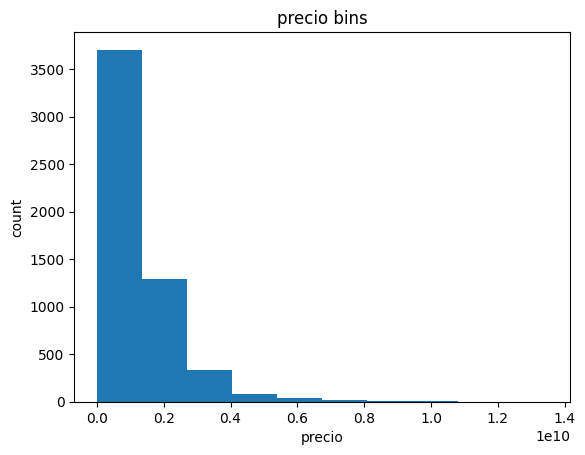

In [137]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["precio"])

# set x/y labels and plot title
plt.pyplot.xlabel("precio")
plt.pyplot.ylabel("count")
plt.pyplot.title("precio bins")

In [138]:
df = df.drop(df[df['precio'] > 5000000000].index)
fig = px.scatter(df['precio'], y='precio', width=1200, height=350)
fig.show()

En la gráfica también se evidencia que hay precios extremadamente bajos, llegando hasta los 250,000 pesos y serían outliers pues se puede estar confundiendo el valor del inmueble con el canon de arrendamiento; por lo que fijamos un límite inferior en 80.000.000

In [139]:
df.drop(df[df['precio'] < 80000000].index, inplace=True)

Text(0.5, 1.0, 'precio bins')

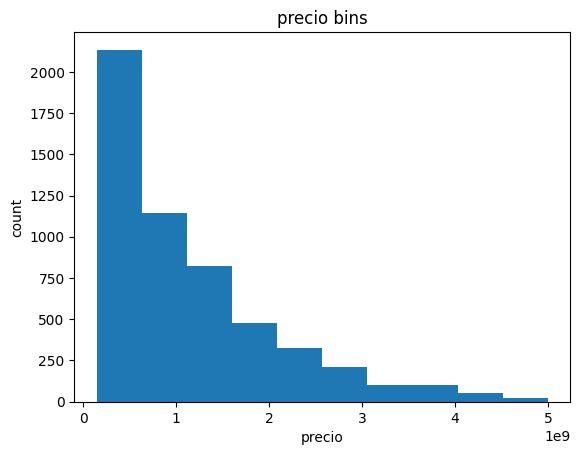

In [140]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["precio"])

# set x/y labels and plot title
plt.pyplot.xlabel("precio")
plt.pyplot.ylabel("count")
plt.pyplot.title("precio bins")

In [141]:
# Calcular media y límites
mean_precio = df['precio'].mean()
std_precio = df['precio'].std()
lim_inf = mean_precio - 3*std_precio
lim_sup = mean_precio + 3*std_precio

# Dibujar distribución y superponer los límites
fig = px.histogram(df['precio'], x='precio', width=800, height=400)
fig.add_vline(x=mean_precio, line_color='black', annotation_text='$\mu$')
fig.add_vline(x=lim_inf, line_color='red', annotation_text='$\mu-3\sigma$')
fig.add_vline(x=lim_sup, line_color='red', annotation_text='$\mu+3\sigma$')
fig.show()

In [142]:
df['antiguead'].value_counts()

Más de 20 años        2147
Entre 10 y 20 años    1241
Entre 5 y 10 años      910
Entre 0 y 5 años       906
Remodelado             192
Name: antiguead, dtype: int64

Los valores de la columna antiguedad vienen dados de forma categóriga ordinal, por lo que los pasaremos a variables discretas según la siguiente tabla de conversión:

Más de 20 años = 3

Entre 10 y 20 años = 2

Entre 5 y 10 años = 1

Entre 0 y 5 años = 0

Remodelado = 0

In [143]:
df['antiguead'].replace('Más de 20 años', int(3), inplace=True)
df['antiguead'].replace('Entre 10 y 20 años', int(2), inplace=True)
df['antiguead'].replace('Entre 5 y 10 años', int(1), inplace=True)
df['antiguead'].replace('Entre 0 y 5 años', int(0), inplace=True)
df['antiguead'].replace('Remodelado', int(0), inplace=True)

En este punto, algunos datos de administración y área de balcón los tenemos nulos, lo que implica que el apartamento no paga administración y no tiene balcón, por lo que reemplazaremos los valores nulos por ceros para que tengan peso matemático.

In [144]:
df['administracion'].replace(np.nan, int(0), inplace=True)
df['area_terraza_balcon_m2'].replace(np.nan, int(0), inplace=True)

In [145]:
df.drop_duplicates()

,precio,area_m2,habitaciones,baños,estrato,barrio,antiguead,administracion,parqueadero,codigo,...,jacuzzi,calefaccion,porteria,vista_panoramica,vista_exterior,picina,terraza,balcon,area_terraza_balcon_m2,localidad
19,290000000,65.0,3,2,3.0,SAN ANTONIO NORTE,2,242000.0,1,4969-M3496985,...,0,0,0,0,0,0,0,1,3.0,CHAPINERO
37,1295000000,248.0,3,4,5.0,COUNTRY CLUB USAQUEN 901,3,10000.0,3,874-M2806611,...,1,0,0,1,0,0,0,0,0.0,CHAPINERO
83,460000000,70.0,3,2,4.0,ESTRELLA DEL NORTE USAQUEN,2,320000.0,2,12947-M3887572,...,0,0,0,0,0,0,0,0,0.0,CHAPINERO
127,3500000000,380.0,4,5,6.0,PRADOS DEL COUNTRY USAQUEN,3,2200000.0,3,11013-M4014391,...,1,0,0,0,0,0,0,1,0.0,CHAPINERO
135,650000000,127.0,3,4,5.0,NUEVO COUNTRY USAQUEN,3,580000.0,2,2529-M4085615,...,0,1,0,0,0,0,0,1,0.0,CHAPINERO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16453,300000000,79.0,3,2,4.0,ESTRELLA DEL NORTE,3,133000.0,1,13793-M4038126,...,0,0,0,0,0,0,0,0,0.0,CHAPINERO
16455,980000000,156.0,3,3,6.0,RECODO DEL COUNTRY,3,650000.0,2,356-M3718478,...,0,1,1,1,0,0,0,0,0.0,CHAPINERO
16456,1145000000,189.0,3,3,6.0,NORTE CHICO NAVARRA,3,1347000.0,3,12095-M3709709,...,0,1,1,1,0,0,0,1,8.0,CHAPINERO
16458,380000000,65.0,1,2,6.0,CHICO NORTE II,2,474000.0,1,2259-M2968645,...,0,1,1,0,0,0,0,0,0.0,CHAPINERO


Eliminamos las columnas que no necesitaremos:

-codigo

-localidad

-barrio

In [146]:
df.drop(['codigo', 'localidad', 'barrio'], axis=1, inplace=True)

In [147]:
df.isnull().sum()

precio                     0
area_m2                    0
habitaciones               0
baños                      0
estrato                   13
antiguead                  0
administracion             0
parqueadero                0
equipado                   0
sauna                      0
jacuzzi                    0
calefaccion                0
porteria                   0
vista_panoramica           0
vista_exterior             0
picina                     0
terraza                    0
balcon                     0
area_terraza_balcon_m2     0
dtype: int64

Eliminamos los registros con datos faltantes para asegurarnos que nuestro dataset ahora está completamente limpio y dispuesto para modelar

In [148]:
df.dropna(subset=["estrato"], axis=0, inplace=True)

In [149]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
precio,5383.0,1.153968e+09,9.376372e+08,150000000.0,435000000.0,850000000.0,1.600000e+09,5.000000e+09
area_m2,5383.0,1.888202e+02,1.248301e+03,0.0,70.0,124.0,2.080000e+02,7.787500e+04
habitaciones,5383.0,2.474642e+00,9.251321e-01,1.0,2.0,3.0,3.000000e+00,5.000000e+00
baños,5383.0,2.836708e+00,1.183425e+00,1.0,2.0,3.0,4.000000e+00,5.000000e+00
estrato,5383.0,5.078209e+00,1.065669e+00,3.0,4.0,6.0,6.000000e+00,6.000000e+00
antiguead,5383.0,1.823333e+00,1.161038e+00,0.0,1.0,2.0,3.000000e+00,3.000000e+00
administracion,5383.0,4.409147e+06,6.521690e+07,0.0,300000.0,650000.0,1.200000e+06,1.900000e+09
parqueadero,5383.0,1.862159e+00,1.066162e+00,0.0,1.0,2.0,2.000000e+00,4.000000e+00
equipado,5383.0,3.956901e-02,1.949625e-01,0.0,0.0,0.0,0.000000e+00,1.000000e+00
sauna,5383.0,6.520528e-02,2.469107e-01,0.0,0.0,0.0,0.000000e+00,1.000000e+00


Revisamos otros valores anómalos:

area_m2: el máximo de área es de 77875m², lo que corresponde más a un lote que a un apartamento, por lo que se eliminarán los registros donde el área sea superior a 800m² e inferior a 10m², pues tampoco deberían existir apartamentos con área de 0m²



In [150]:
df.drop(df[df['area_m2'] < 15].index, inplace=True)
df.drop(df[df['area_m2'] > 800].index, inplace=True)

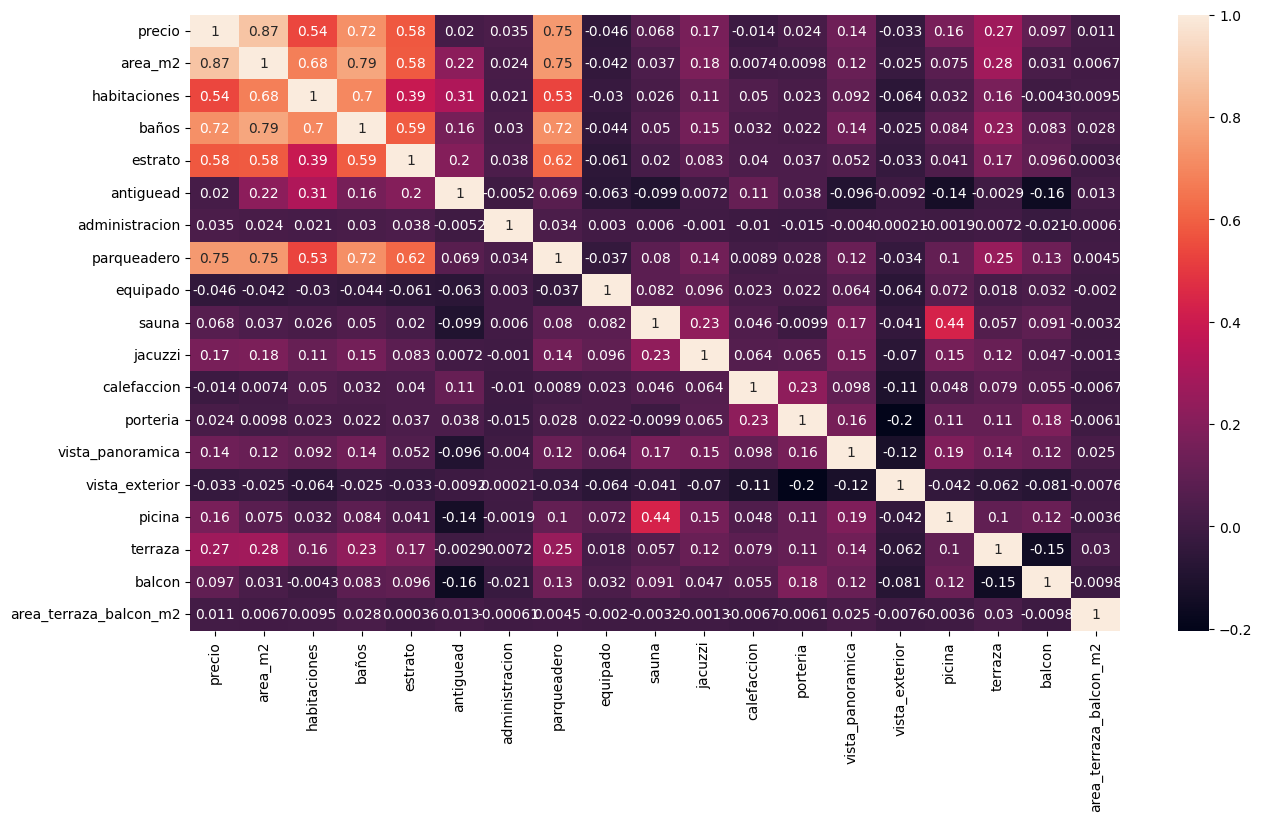

In [151]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una figura y obtener los ejes
plt.figure(figsize=(15, 8))
ax = plt.gca()

# Generar el mapa de calor utilizando los ejes especificados
sns.heatmap(data=df.corr(), annot=True, ax=ax)

# Mostrar la figura
plt.show()


In [152]:
corr = df.corr()
print(corr['precio'].sort_values(ascending=False))

precio                    1.000000
area_m2                   0.873892
parqueadero               0.748608
baños                     0.724906
estrato                   0.577258
habitaciones              0.535495
terraza                   0.266284
jacuzzi                   0.165600
picina                    0.163901
vista_panoramica          0.137534
balcon                    0.097336
sauna                     0.068060
administracion            0.035267
porteria                  0.023887
antiguead                 0.020020
area_terraza_balcon_m2    0.010725
calefaccion              -0.013524
vista_exterior           -0.033109
equipado                 -0.045876
Name: precio, dtype: float64


# 

# Plots

<ipython-input-153-2b4a60eda91d>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




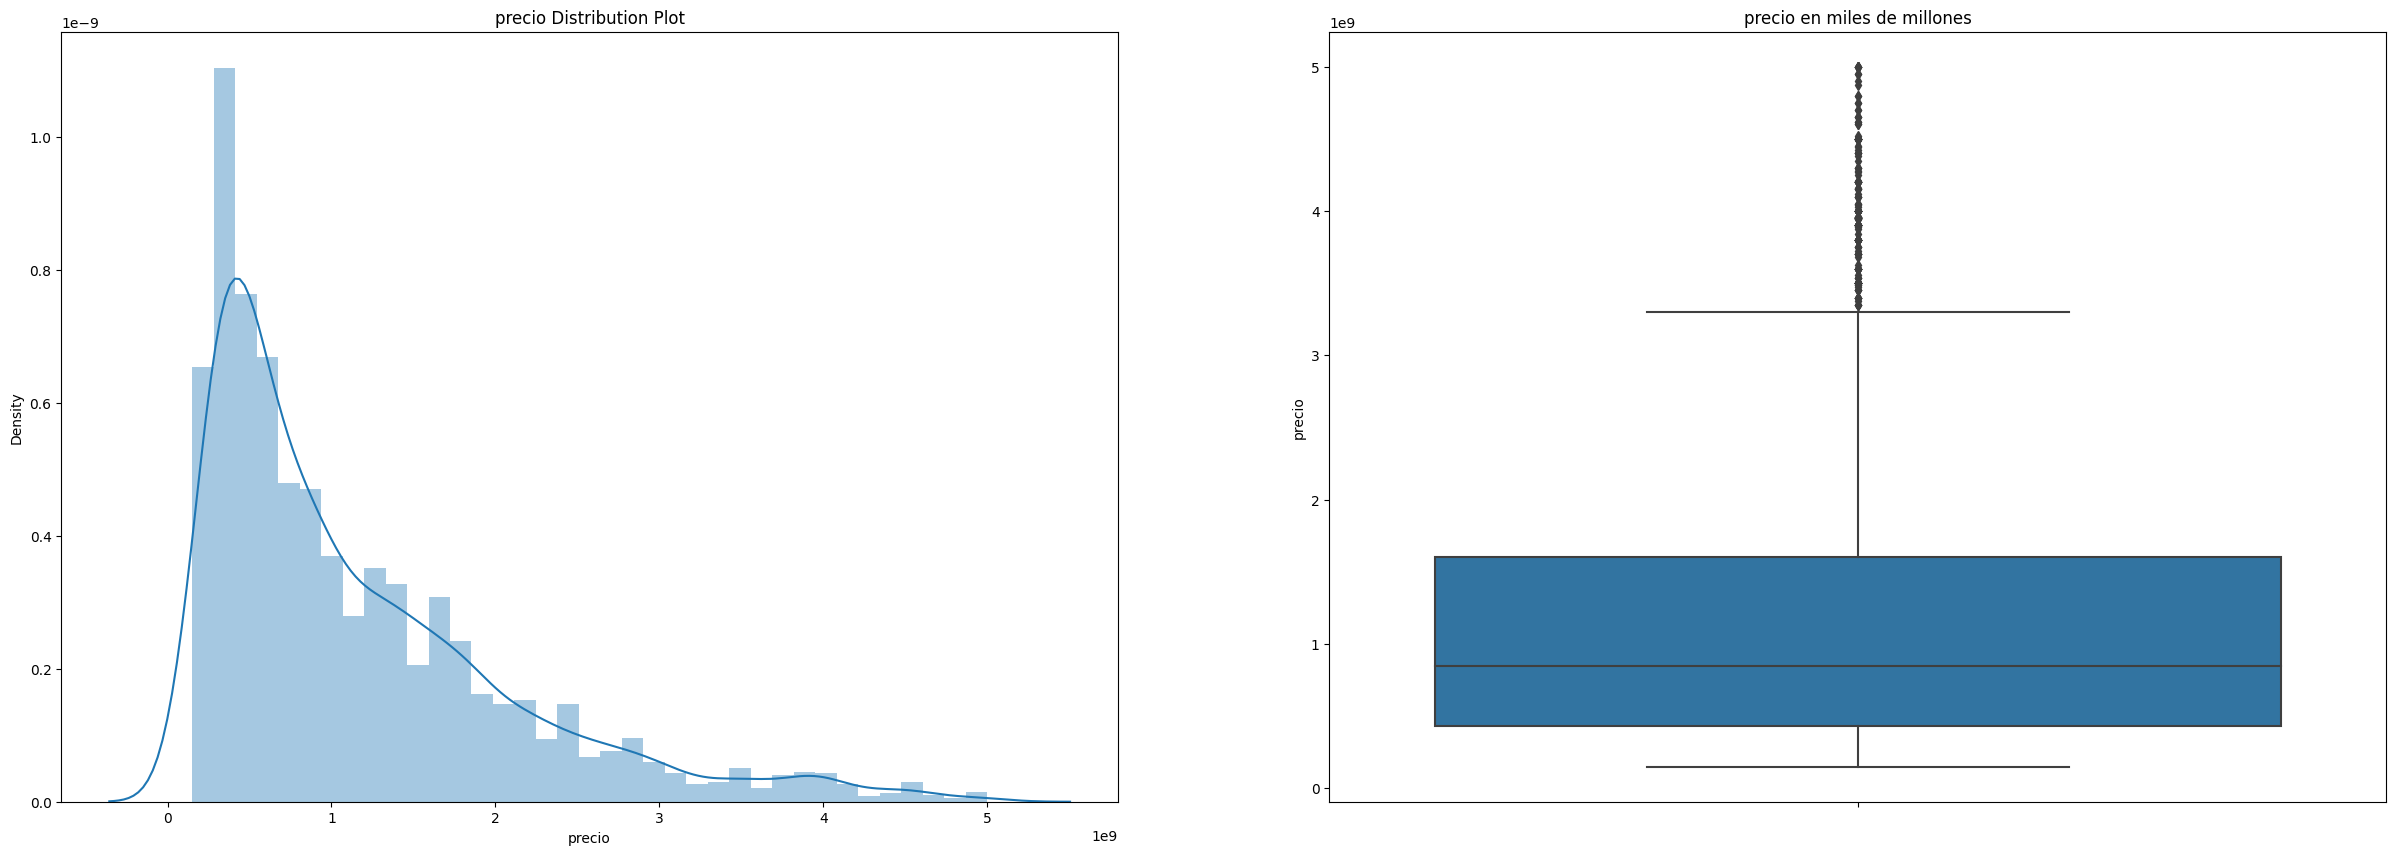

In [153]:
plt.figure(figsize=(30,10))

plt.subplot(1,2,1)
plt.title('precio Distribution Plot')
sns.distplot(df["precio"])

plt.subplot(1,2,2)
plt.title('precio en miles de millones')
sns.boxplot(y=df["precio"])

plt.show()

# Normalize

In [154]:
columns = df.columns

In [155]:
'''
scaler = preprocessing.MinMaxScaler(feature_range = (0, 1))
normal = pd.DataFrame(scaler.fit_transform(df), columns = columns)
normal.head(20)
'''

'\nscaler = preprocessing.MinMaxScaler(feature_range = (0, 1))\nnormal = pd.DataFrame(scaler.fit_transform(df), columns = columns)\nnormal.head(20)\n'

In [156]:
df.shape

(5363, 19)

# 

# Modeling

In [157]:
y_data = df['precio']
x_data=df.drop('precio',axis=1)

In [158]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.20, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 1073
number of training samples: 4290


In [159]:
from sklearn.linear_model import LinearRegression

In [160]:
lre=LinearRegression()

In [161]:
lre.fit(x_train, y_train)

LinearRegression()

In [162]:
lre.score(x_test, y_test)

0.8329335859797258

In [163]:
lre.score(x_train, y_train)

0.8191296225560191

Cross-Validation Score

In [164]:
from sklearn.model_selection import cross_val_score

In [165]:
Rcross = cross_val_score(lre, x_data, y_data, cv=4)

In [166]:
Rcross

array([-0.36799014,  0.74222161,  0.76923202,  0.79017262])

In [167]:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.48340902657918056 and the standard deviation is 0.4918493610326116


In [168]:
-1 * cross_val_score(lre,x_data, y_data,cv=4,scoring='neg_mean_squared_error')

array([8.44252940e+17, 1.14066481e+17, 2.34089777e+17, 2.05685368e+17])

In [169]:
yhat_train = lre.predict(x_train)
yhat_test = lre.predict(x_test)

In [170]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [171]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Precio')
    plt.ylabel('Proporción de apartamentos')

    plt.show()
    plt.close()

<ipython-input-171-91995e25d2d2>:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-171-91995e25d2d2>:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




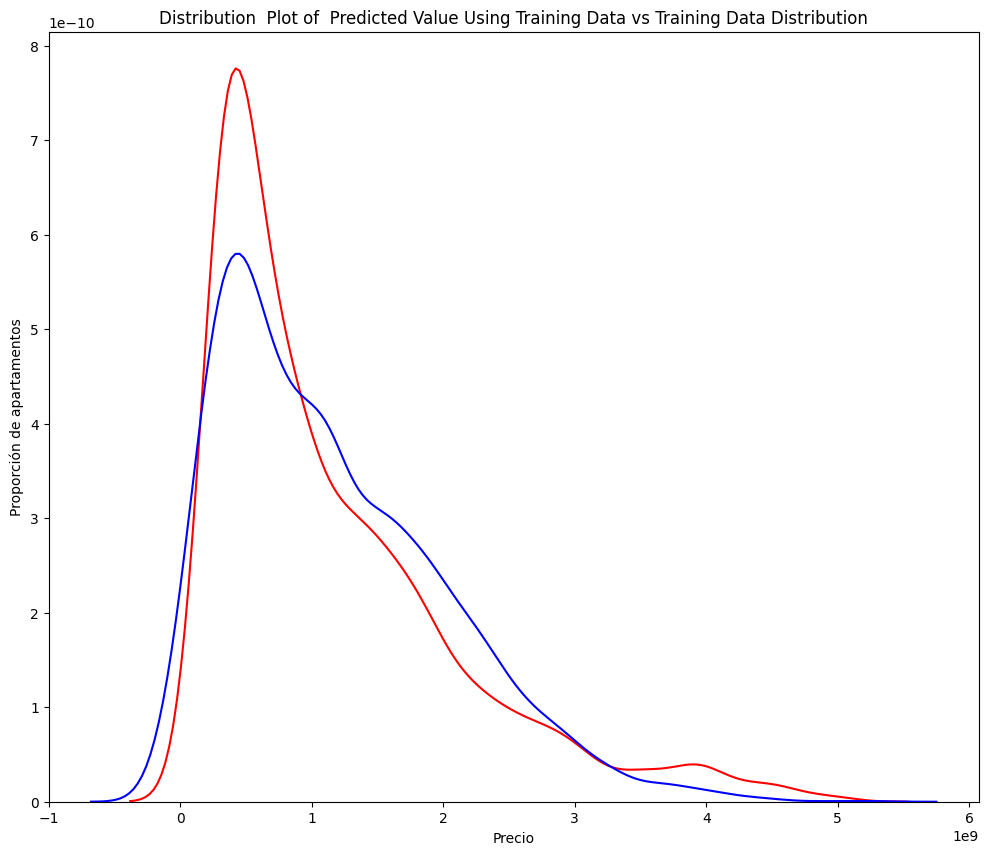

In [172]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

<ipython-input-171-91995e25d2d2>:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-171-91995e25d2d2>:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




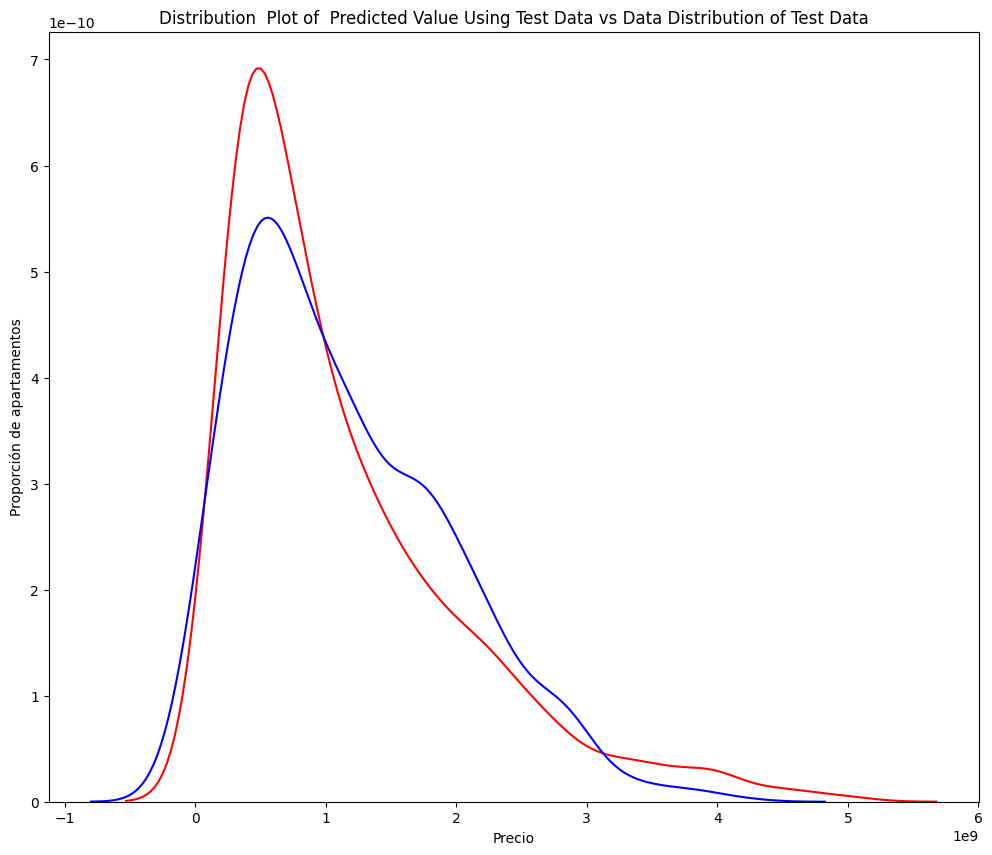

In [173]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)